## Implement an analysis about football soccer using data analysys visualization and SQL tools



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams["figure.figsize"] = (8, 6)  #set default figure size
thick_size=16
label_size=20


###EXPLANATION ABOUT BETTING COLUMNS AT      https://www.football-data.co.uk/notes.txt
##FROM https://www.football-data.co.uk/italym.php 
## Fetching data
#Connecting to database
path = "./"  #Insert path here
database = path + 'database.sqlite'
conn = sqlite3.connect(database)


In [2]:
from matplotlib import rc
rc("text", usetex=False)

In [3]:
#####Fetch all tables in sqlite database

sql_query = """SELECT * FROM sqlite_master  WHERE type='table';"""
all_tables=pd.read_sql(sql_query, conn)
all_tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [4]:
###Store some tables in separate pandas
country_data = pd.read_sql("SELECT * FROM Country;", conn)
league_data = pd.read_sql("SELECT * FROM League;", conn)
league_data["country_name"]=country_data["name"]
player_data = pd.read_sql("SELECT * FROM Player;", conn)
player_stats_data = pd.read_sql("SELECT * FROM Player_Attributes;", conn)
team_data = pd.read_sql("SELECT * FROM Team ORDER BY team_long_name;", conn)
team_stats_data=pd.read_sql("SELECT * FROM Team_Attributes;", conn)
match_data = pd.read_sql("SELECT * FROM Match;", conn)

In [5]:
###Merge player_name and player_stats tables by calling how="outer"

players_all_data=pd.merge(player_stats_data,player_data,how="outer",on=["player_api_id"])
players_all_data["Date"]=pd.to_datetime(players_all_data.date)
players_all_data["year"]=players_all_data["Date"].apply(lambda x: x.year)



## Arrange Data into Features Matrix

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

In [28]:
df=players_all_data.sort_values("year")
year=2015
df=df[df.year==year]

all_features = ["player_name",'overall_rating', 'potential','crossing', 'finishing', 'heading_accuracy',
            'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
            'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
            'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
            'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
            'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
            'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
            'gk_reflexes','height', 'weight']

features = ['crossing', 'finishing', 'heading_accuracy',
            'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
            'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
            'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
            'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
            'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
            'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
            'gk_reflexes','height', 'weight']





## KMeans Clustering


In [29]:
# Apply Standardization to features matrix X
x = df.loc[:, features].dropna().values
x = StandardScaler().fit_transform(x)

# Make an instance of KMeans with 3 clusters
kmeans = KMeans(n_clusters=2, random_state=1)

# Fit only on a features matrix
kmeans.fit(x)

KMeans(n_clusters=2, random_state=1)

In [30]:
# Get labels and cluster centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
x = pd.DataFrame(x, columns = features)


In [31]:
kmeans.inertia_

723795.9473043052

## Visually Evaluate the Clusters


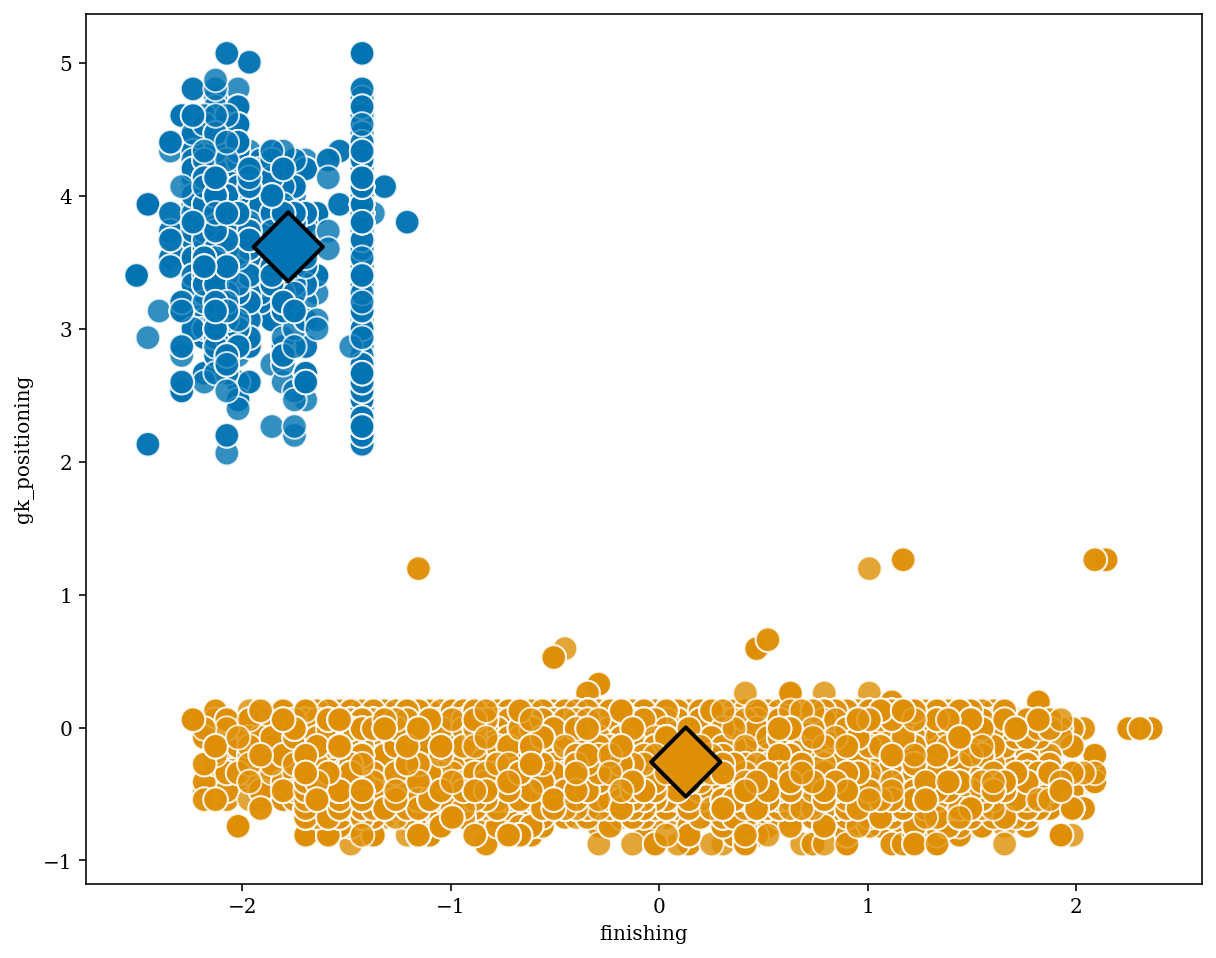

In [37]:

features = ['crossing', 'finishing', 'heading_accuracy',
            'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
            'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
            'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
            'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
            'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
            'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
            'gk_reflexes','height', 'weight']

cluster_centers = pd.DataFrame(centroids, columns = features)


# Set the figure size
plt.figure(figsize=(10, 8))
xdat='finishing'
ydat='gk_positioning'

#Plot the Clusters
ax = sns.scatterplot(data = x,
                     x = xdat,
                     y = ydat, 
                     hue =labels, 
                     palette = 'colorblind', 
                     alpha = 0.8, 
                     s = 150,
                     legend = False)

#Plot the Centroids
ax = sns.scatterplot(data = cluster_centers, 
                     x = xdat,
                     y = ydat, 
                     hue = cluster_centers.index, 
                     palette = 'colorblind', 
                     s = 600,
                     marker = 'D',
                     ec = 'black', 
                     legend = False
                    )

## Choose the right number of Clusters¶

In [72]:
df=players_all_data.sort_values("year")
df=df[df.year==year]
df=df[all_features].dropna()
df["position"]=list(labels)
df=df.sort_values("overall_rating",ascending=False)
df["position"]=df["position"].apply(lambda x: "GK" if x==0 else "Field" ).to_list()
df_field=df[df.position=="Field"]

features = ['crossing', 'finishing', 'heading_accuracy',
            'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
            'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
            'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
            'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
            'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle','height', 'weight']

df_field=df_field[features]


### The Within Cluster Sum of Squares (WCSS)


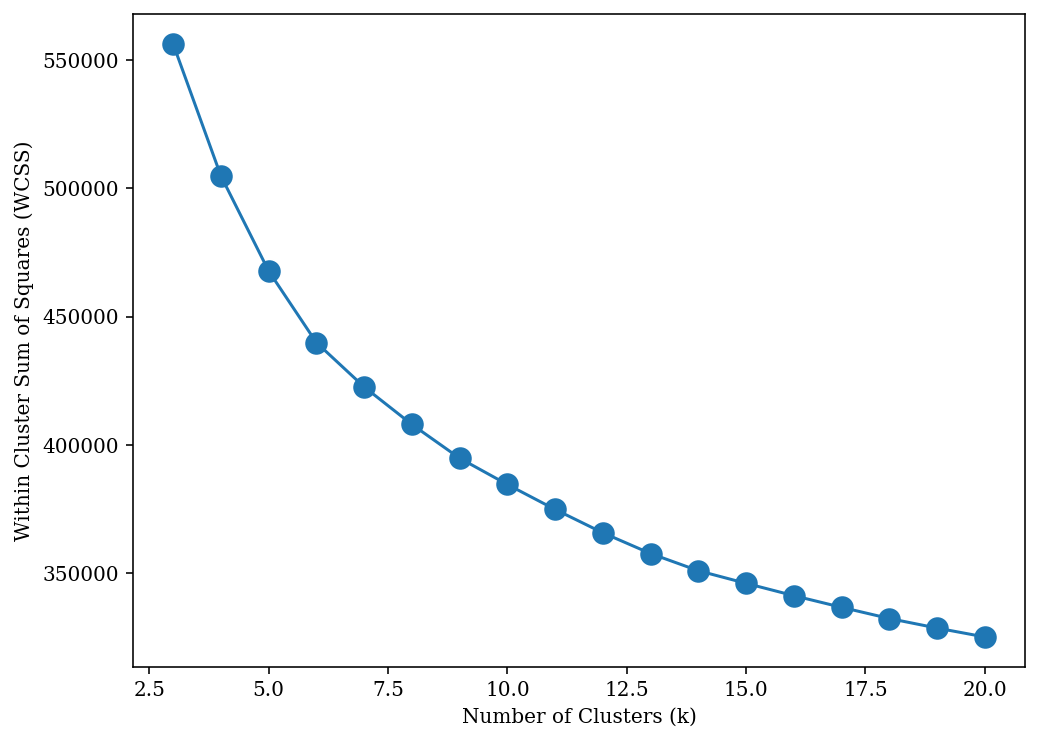

In [73]:
# Apply Standardization to features matrix X
x = df_field.loc[:, features].dropna().values

x = StandardScaler().fit_transform(x)



wcss = []
for k in range(3, 21):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(x)
    wcss.append(km.inertia_)

wcss_series = pd.Series(wcss, index = range(3, 21))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = wcss_series, x = wcss_series.index)
ax = sns.scatterplot(y = wcss_series, x = wcss_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Within Cluster Sum of Squares (WCSS)')

### The Average Silhouette Score

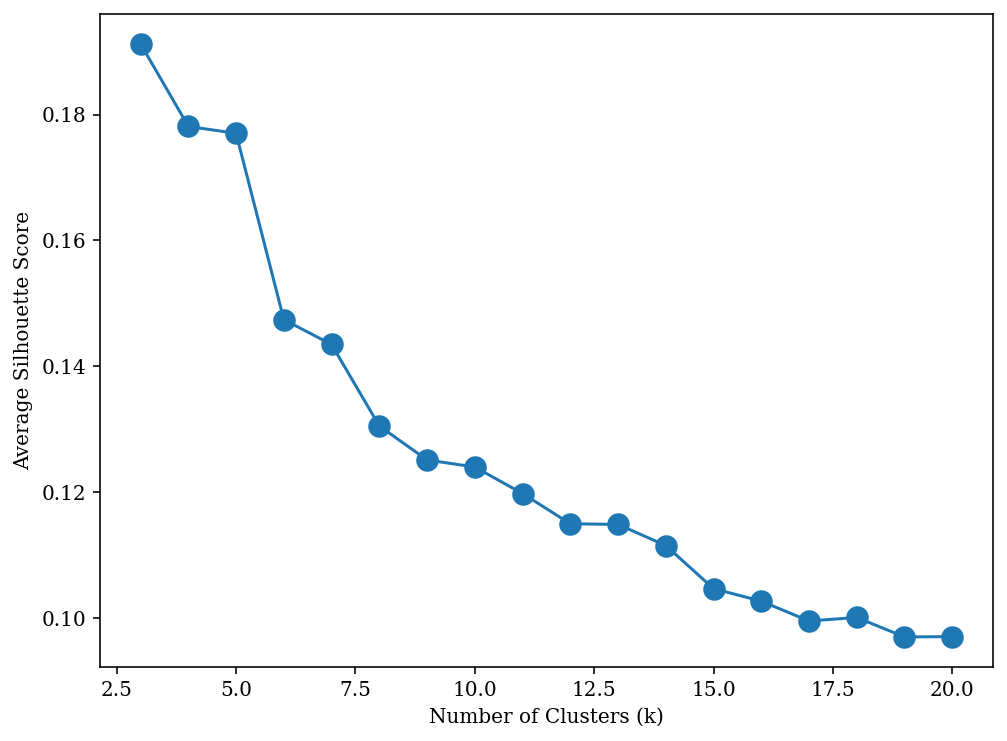

In [74]:
from sklearn.metrics import silhouette_score

silhouette = []
for k in range(3, 21):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(x)
    silhouette.append(silhouette_score(x, km.labels_))

silhouette_series = pd.Series(silhouette, index = range(3, 21))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = silhouette_series, x = silhouette_series.index)
ax = sns.scatterplot(y = silhouette_series, x = silhouette_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Average Silhouette Score')

### The Calinski Harabasz Score

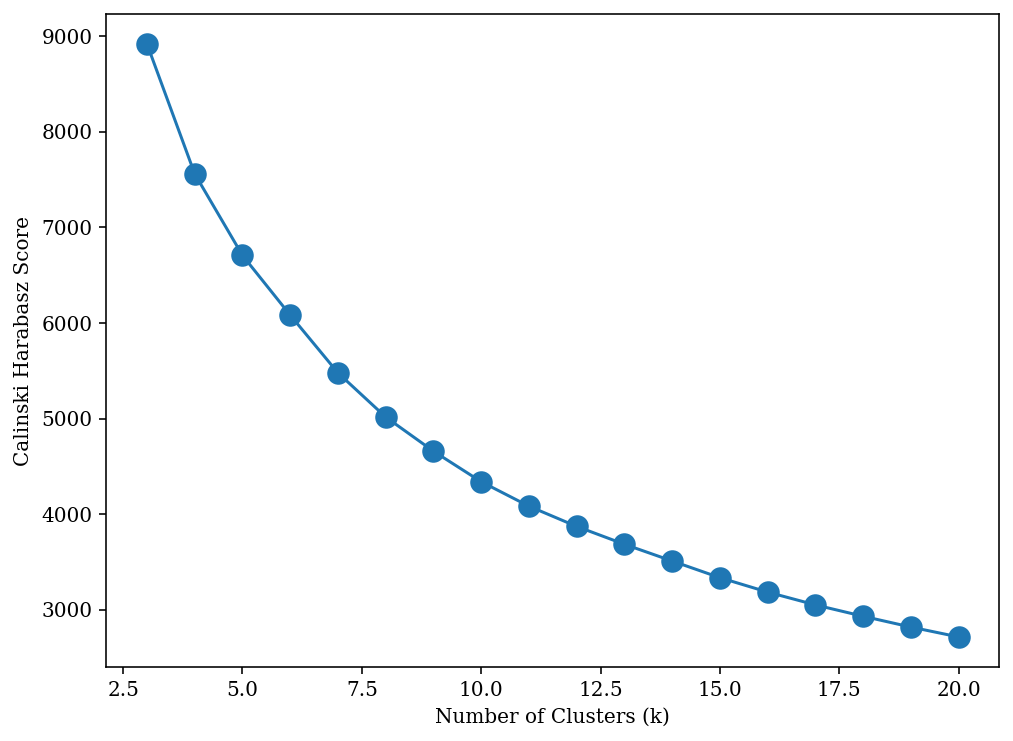

In [75]:
from sklearn.metrics import calinski_harabasz_score

calinski = []
for k in range(3, 21):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(x)
    calinski.append(calinski_harabasz_score(x, km.labels_))

calinski_series = pd.Series(calinski, index = range(3, 21))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = calinski_series, x = calinski_series.index)
ax = sns.scatterplot(y = calinski_series, x = calinski_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Calinski Harabasz Score')